In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
parks = gpd.read_file("C:/Users/robsc/Downloads/Metro Parks Boundaries (GIS).geojson")
print(parks.crs)
parks.head( )

epsg:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [3]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [4]:
parks_geo = gpd.GeoDataFrame(parks, 
                           crs = zipcodes.crs, 
                           geometry = parks['geometry'])

In [5]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [6]:
parks_by_zip = gpd.sjoin(parks_geo, zipcodes, op = 'within')

In [25]:
parks_by_zip.head(100)

,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry,index_right,zip,po_name
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...",7,37221,NASHVILLE
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...",7,37221,NASHVILLE
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...",7,37221,NASHVILLE
127,0.51,Bellevue Tennis Courts,0,Bellevue Tennis Courts,TENNIS,Colice Jeane Rd @ Baugh Rd,0,0,None,"MULTIPOLYGON (((-86.93431 36.07001, -86.93416 ...",7,37221,NASHVILLE
154,0.1,Harpeth School Playground,2002,Harpeth School Playground,PLAYGROUND,Learning Ln @ Collins Rd,0,0,None,"MULTIPOLYGON (((-86.95997 36.04626, -86.95980 ...",7,37221,NASHVILLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.68,Monroe Street Playground,1984,Monroe,PARK,1043 Monroe Street,-86.798599,36.173175,None,"MULTIPOLYGON (((-86.79867 36.17361, -86.79851 ...",40,37208,NASHVILLE
118,0.1,Jones Paideia School Playground,2002,Jones Paideia School Playground,PLAYGROUND,9th Ave N @ Buchanan,0,0,None,"MULTIPOLYGON (((-86.80205 36.18186, -86.80181 ...",40,37208,NASHVILLE
166,0.1,Hull Jackson School Playground,2002,Hull Jackson School Playground,PLAYGROUND,Kellow St @ 10th Ave N,0,0,None,"MULTIPOLYGON (((-86.80677 36.19074, -86.80654 ...",40,37208,NASHVILLE
197,0.0818947508177,None,2008,Cumberland River Greenway - Downtown,GW,1115 1st Ave N,0,0,None,"MULTIPOLYGON (((-86.78286 36.17646, -86.78243 ...",40,37208,NASHVILLE


In [9]:
parks_by_zip['zip'].value_counts()

37221    21
37214    19
37208    18
37228    17
37013    16
37211    16
37209    15
37201    13
37206    13
37203    12
37218    12
37138    11
37207    10
37076     9
37205     8
37115     7
37217     6
37210     6
37215     5
37216     4
37204     3
37212     3
37189     3
37220     2
37027     2
37080     2
37219     2
37213     1
37072     1
Name: zip, dtype: int64

In [10]:
parks_in_37206 = parks_by_zip.loc[parks_by_zip['zip'] == '37206']
parks_in_37206.shape

(13, 13)

In [11]:
polygon37206 = zipcodes.loc[zipcodes['zip'] == '37206']
polygon37206.shape

(1, 3)

C:\Users\robsc\anaconda3\envs\geospatial\lib\site-packages\geopandas\plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


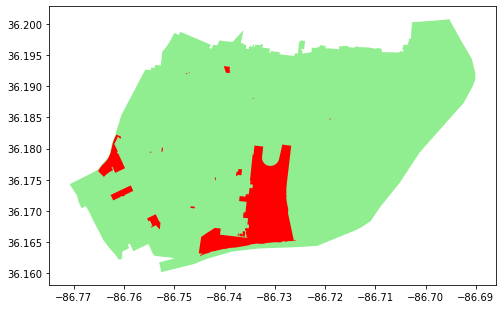

In [12]:
ax = polygon37206.plot(figsize = (8, 10), color = 'lightgreen')
parks_in_37206.plot( ax = ax, column = 'name', color = 'red');
plt.show();

C:\Users\robsc\anaconda3\envs\geospatial\lib\site-packages\geopandas\plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


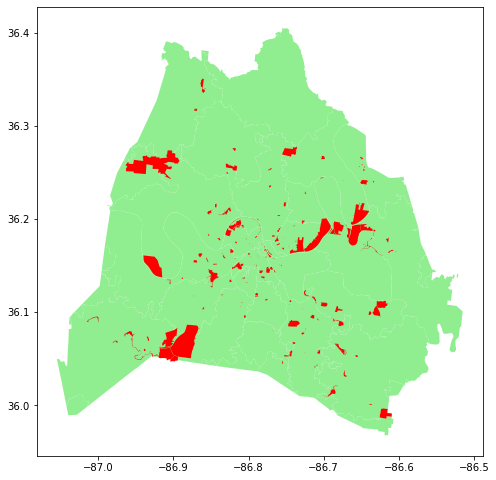

In [13]:
ax = zipcodes.plot(figsize = (8, 10), color = 'lightgreen')
parks.plot( ax = ax, column = 'name', color = 'red');
plt.show();

<AxesSubplot:>

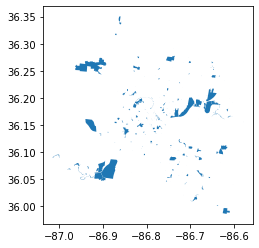

In [14]:
parks.plot()

In [17]:
center = polygon37206.geometry.centroid
print(center)

13    POINT (-86.73098 36.18090)
dtype: geometry


C:\Users\robsc\AppData\Local\Temp\ipykernel_14468\2389381423.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37206.geometry.centroid


In [18]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[13    36.180897
dtype: float64, 13   -86.730983
dtype: float64]


In [19]:
map_37206 = folium.Map(location =  area_center, zoom_start = 12)
map_37206

In [28]:
i = 0
for row_index, row_values in parks_in_37206.iterrows():
    if i <14: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 21
values are:
 
acres                                                       0.34
name                                      East Jr. Tennis Courts
year_estab                                                     0
common_nam                                East Jr. Tennis Courts
status                                                    TENNIS
address                                    Gallatin Ave @11th St
lon                                                            0
lat                                                            0
descriptio                                                  None
geometry       (POLYGON ((-86.75247279800291 36.1801569414533...
index_right                                                   13
zip                                                        37206
po_name                                                NASHVILLE
Name: 21, dtype: object
------------------------- 
index is 51
values are:
 
acres                                               

In [57]:
#draw our zip code area: 37207
map_37206 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37206).add_to(map_37206)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in parks_in_37206.iterrows():
    geo_37206 = gpd.GeoSeries(row_values['geometry']).simplify(tolerance=0.001)
    geo_j = geo_37206.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'red'})
    folium.Tooltip(row_values['name']).add_to(geo_j)
    folium.Popup(row_values['descriptio']).add_to(geo_j)
    geo_j.add_to(map_37206)
    #loc = [row_values.lat, row_values.lon]
    #pop = str(row_values['name'])
    #pop2 = str(row_values['address'])
    #icon=folium.Icon(color="blue",icon="tree", prefix='fa')
    
    #marker = folium.Marker(
        #location = loc, 
        #tooltip = (pop, pop2), icon = icon) 

    #marker.add_to(map_37206)
map_37206.save('../maps/map37206.html')

#display our map
map_37206

In [26]:
# Project to NAD83 projected crs
df = df.to_crs(epsg=2263)

# Access the centroid attribute of each polygon
df['centroid'] = df.centroid

0      False
1      False
2      False
127    False
154    False
       ...  
221    False
222    False
225    False
226    False
227    False
Name: zip, Length: 257, dtype: bool
